In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Heart Disease Cleveland UCI

There are 12 attributes

1. Age: age in years
2. Sex: sex (1 = male; 0 = female)
3. ChestPainType: chest pain type
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic
4. RestingBP: resting blood pressure (in mm Hg on admission to the hospital)
5. Cholesterol: serum cholestoral in mg/dl
6. FastingBS: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. RestingECG: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaxHR: maximum heart rate achieved
9. ExerciseAngina: exercise induced angina (1 = yes; 0 = no)
10. Oldpeak = ST depression induced by exercise relative to rest
11. ST_Slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping
12. HeartDisease: 0 = no disease, 1 = disease

In [2]:
df = pd.read_csv('../../Data/UCL_ML-Respo/UCLCombined_dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,69,1,0,160,234,1,2,131,0,0.1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0


## Basic Data Checkup & Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2240 non-null   int64  
 1   Sex             2240 non-null   int64  
 2   ChestPainType   2240 non-null   int64  
 3   RestingBP       2240 non-null   int64  
 4   Cholesterol     2240 non-null   int64  
 5   FastingBS       2240 non-null   int64  
 6   RestingECG      2240 non-null   int64  
 7   MaxHR           2240 non-null   int64  
 8   ExerciseAngina  2240 non-null   int64  
 9   Oldpeak         2240 non-null   float64
 10  ST_Slope        2240 non-null   int64  
 11  HeartDisease    2240 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 210.1 KB


In [4]:
df.shape

(2240, 12)

In [5]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Checking for the unique values in the datasets
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
df.drop_duplicates(keep="first",inplace=True)
df.shape

(1220, 12)

**Datasets looks okay, no missing values. Dropped the duplicates which deleted half of our dataset**

## Exploratory Data Analysis

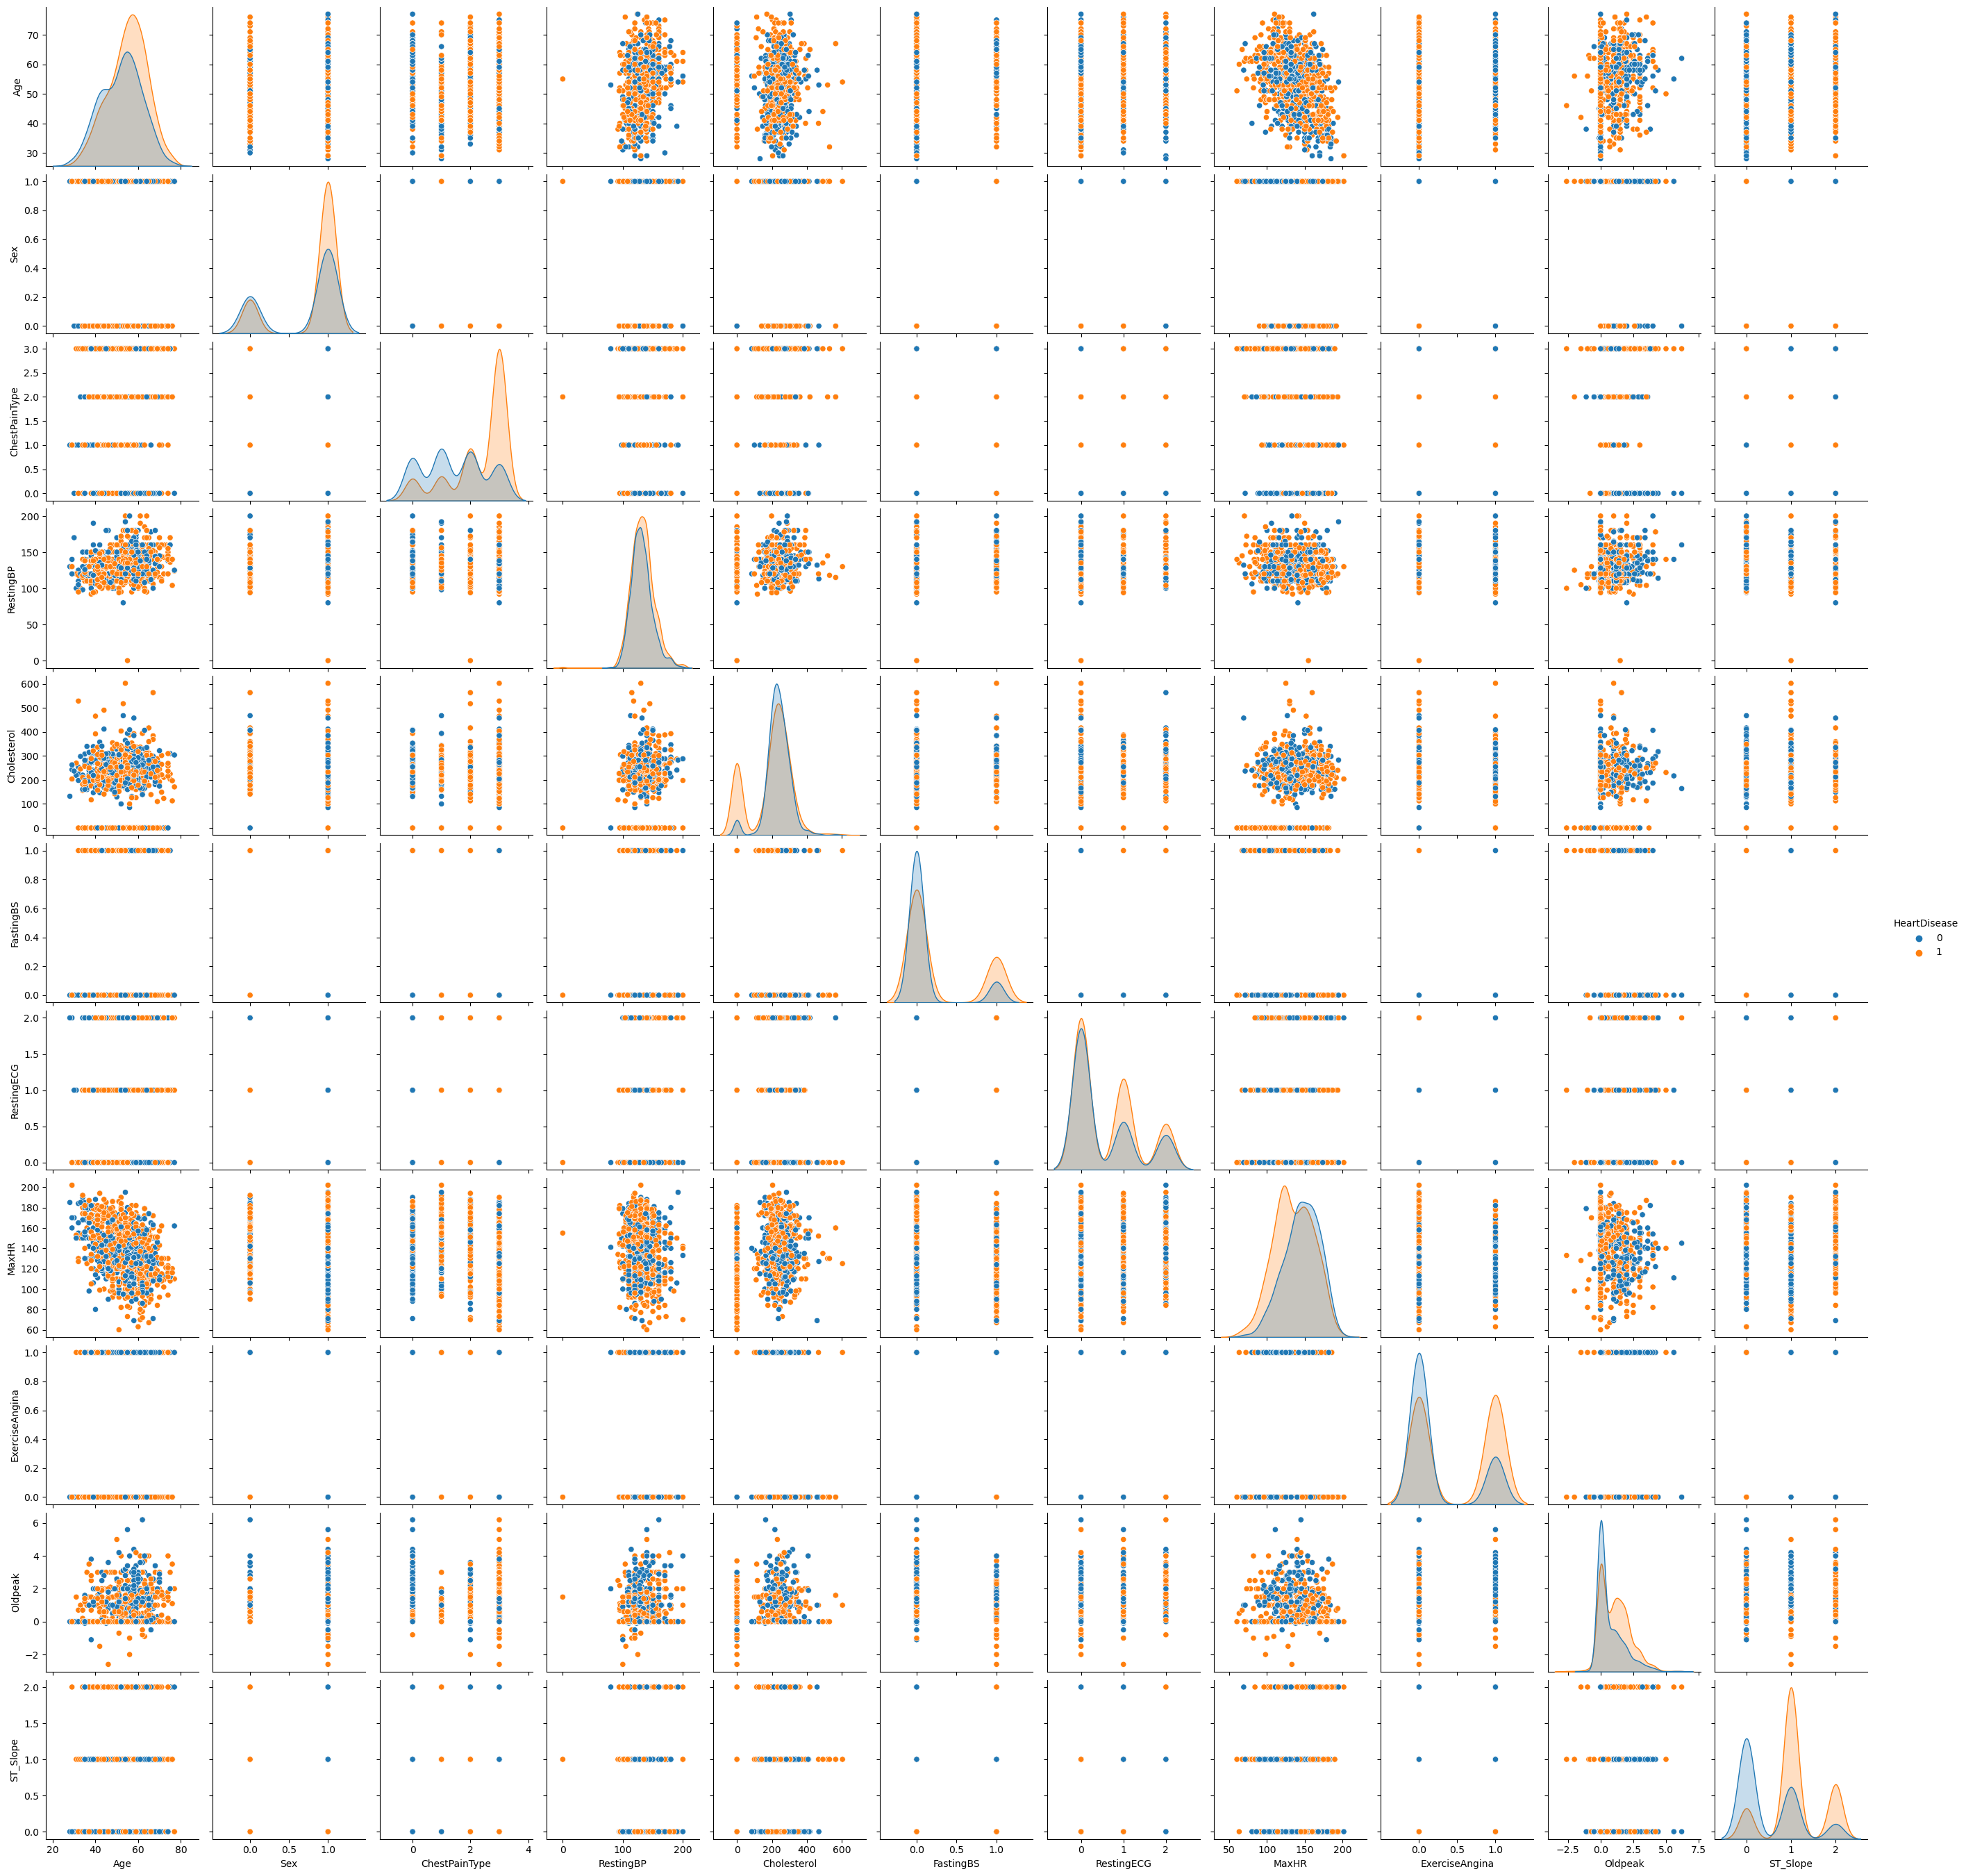

In [8]:
sns.pairplot(data=df,hue="HeartDisease")
plt.show()

### Age

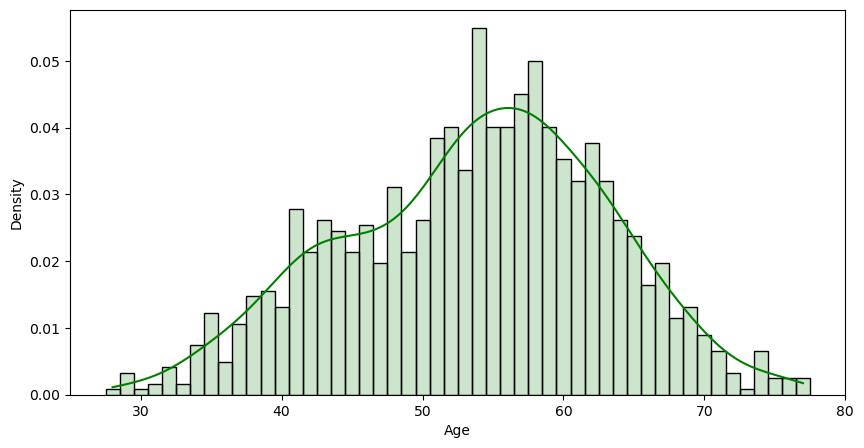

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde= True,stat='density', discrete=True, color='green', alpha=0.2)
plt.show()

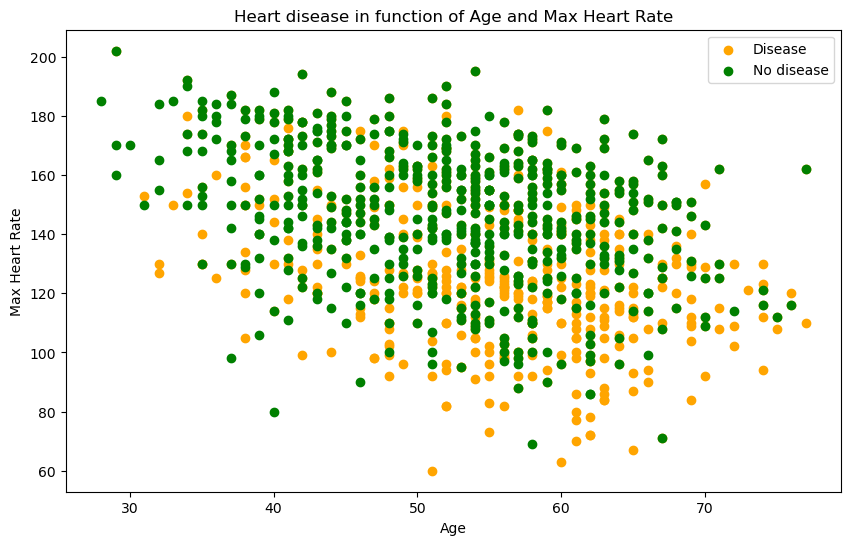

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(df["Age"][df["HeartDisease"]==1], df["MaxHR"][df["HeartDisease"]==1], c="orange")
plt.scatter(df["Age"][df["HeartDisease"]==0], df["MaxHR"][df["HeartDisease"]==0], c="green")
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])
plt.show()

* We can observe a trend showing that with older age the prevalence of heart diseases grows

### Sex

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,69,1,0,160,234,1,2,131,0,0.1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0


In [12]:
df['Sex'].value_counts()

1    931
0    289
Name: Sex, dtype: int64

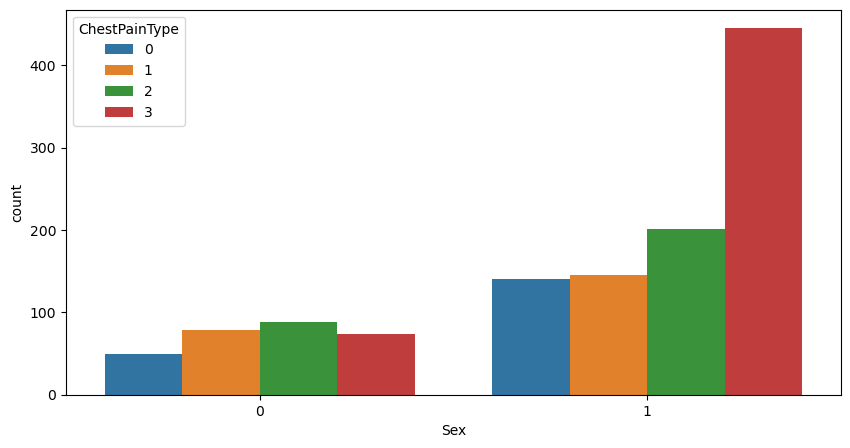

In [15]:
# Sex Vs ChestPainType
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', hue='ChestPainType', data=df)
plt.show()

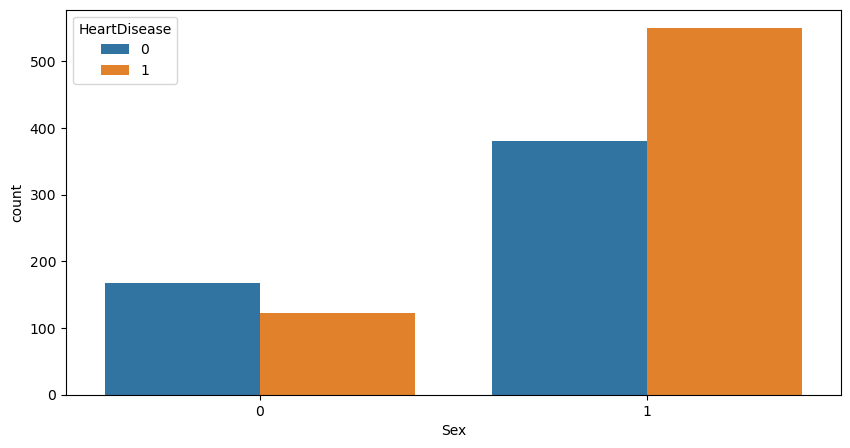

In [13]:
# Sex Vs HeartDisease
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', hue=df['HeartDisease'], data=df)
plt.show()